In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from scipy import stats
from scipy.stats import zscore

Scaling: mengubah range data
normalization: mengubah shape of the distribution data

In [4]:
data = pd.read_csv('Social_Network_Ads.csv')
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
data.drop('Purchased', axis=1, inplace=True)
data

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


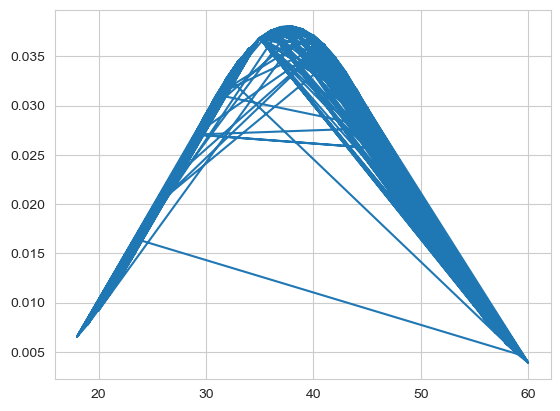

In [25]:
from scipy.stats import norm
import statistics

age_values = data['Age'].astype(int).values

mean_age = statistics.mean(data['Age'])
sd_age = statistics.stdev(data['Age'])

plt.plot(age_values, norm.pdf(age_values, mean_age, sd_age))
plt.show()

Normalization data using MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.02380952, 0.02962963],
       [0.4047619 , 0.03703704],
       [0.19047619, 0.20740741],
       [0.21428571, 0.31111111],
       [0.02380952, 0.45185185],
       [0.21428571, 0.31851852],
       [0.21428571, 0.51111111],
       [0.33333333, 1.        ],
       [0.16666667, 0.13333333],
       [0.4047619 , 0.37037037],
       [0.19047619, 0.48148148],
       [0.19047619, 0.27407407],
       [0.04761905, 0.52592593],
       [0.33333333, 0.02222222],
       [0.        , 0.4962963 ],
       [0.26190476, 0.48148148],
       [0.69047619, 0.07407407],
       [0.64285714, 0.08148148],
       [0.66666667, 0.0962963 ],
       [0.71428571, 0.1037037 ],
       [0.64285714, 0.05185185],
       [0.69047619, 0.25185185],
       [0.71428571, 0.19259259],
       [0.64285714, 0.05185185],
       [0.66666667, 0.05925926],
       [0.69047619, 0.03703704],
       [0.73809524, 0.0962963 ],
       [0.69047619, 0.11111111],
       [0.26190476, 0.20740741],
       [0.30952381, 0.02222222],
       [0.

In [7]:
data

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [21]:
df_scaled = pd.DataFrame(scaled_data, columns=data.columns)
df_scaled

,Age,EstimatedSalary
0,0.023810,0.029630
1,0.404762,0.037037
2,0.190476,0.207407
3,0.214286,0.311111
4,0.023810,0.451852
...,...,...
395,0.666667,0.192593
396,0.785714,0.059259
397,0.761905,0.037037
398,0.428571,0.133333


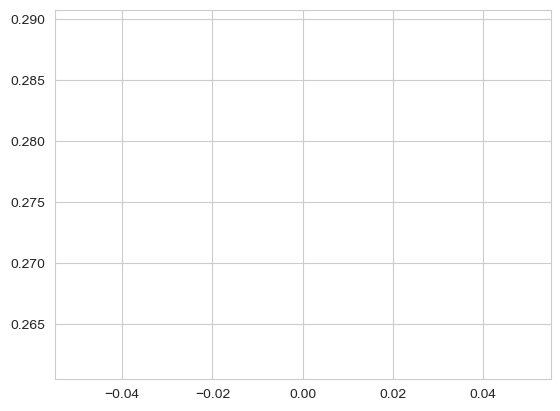

In [24]:
age_values = df_scaled['Age'].astype(int).values

mean_age = statistics.mean(df_scaled['Age'])
sd_age = statistics.stdev(df_scaled['Age'])

plt.plot(age_values, norm.pdf(age_values, mean_age, sd_age))
plt.show()

Using Zscore

In [8]:
scaled_data_2 = zscore(data)
scaled_data_2

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [26]:
df_scaled_2 = pd.DataFrame(scaled_data_2, columns=data.columns)
df_scaled_2

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


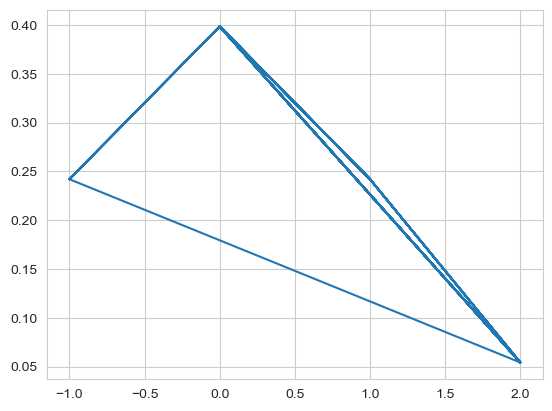

In [30]:
age_values = df_scaled_2['Age'].astype(int).values

mean_age = df_scaled_2['Age'].mean()
sd_age = statistics.stdev(df_scaled_2['Age'])

plt.plot(age_values, norm.pdf(age_values, mean_age, sd_age))
plt.show()

Using StandardScaler

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_3 = scaler.fit_transform(data)

df_3 = pd.DataFrame(scaled_data_3, columns=data.columns)
df_3.describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-7.105427e-17,-1.776357e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [36]:
scaled_data_2.describe()

,Age,EstimatedSalary
count,4.000000e+02,4.000000e+02
mean,-7.105427e-17,-1.776357e-17
std,1.001252e+00,1.001252e+00
min,-1.877311e+00,-1.607506e+00
25%,-7.550313e-01,-7.852897e-01
50%,-6.256110e-02,7.561451e-03
75%,7.970571e-01,5.361289e-01
max,2.134241e+00,2.356750e+00


In [37]:
df_1 = pd.DataFrame(scaled_data, columns=data.columns)
df_1.describe()

,Age,EstimatedSalary
count,400.000000,400.000000
mean,0.467976,0.405500
std,0.249592,0.252570
min,0.000000,0.000000
25%,0.279762,0.207407
50%,0.452381,0.407407
75%,0.666667,0.540741
max,1.000000,1.000000
